<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プログラム1 (Pandas)：母集団推定

母平均を入力してください：50
母標準偏差を入力してください：10
… 母集団生成中 …
標本数を入力してください：10
… 標本抽出中 …
信頼度を入力してください [％]：95
母標準偏差は判明しているものとする [ YES | NO ]：NO

標本数が30未満で少ないため，t分布・χ²分布による推定を行います．



,標本,母集団
平均(信頼度95.0％),43.40 ～ 60.78,50.0
標準偏差(信頼度95.0％),8.35 ～ 22.17,10.0
範囲,35.07 ～ 66.15,11.07 ～ 94.97


<function matplotlib.pyplot.show(close=None, block=None)>

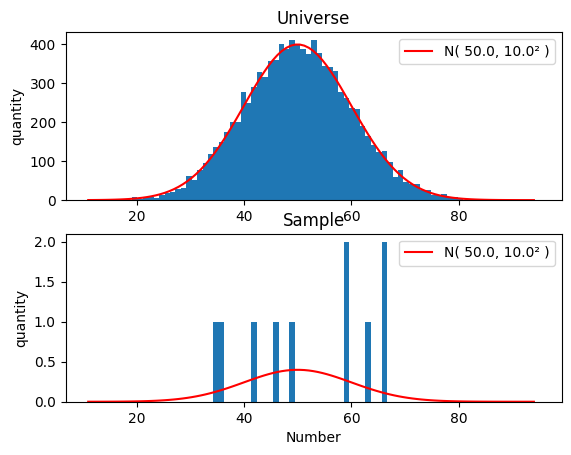

In [ ]:
import pandas as pd
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as sps
from matplotlib import pyplot as plt
import random
import numpy as np

# 正規分布に従う母集団(10000個の数値)を生成
def random_generator(ave,sig):
  df_uni = pd.DataFrame()
  for N in range(10000):
    new_row = {"母集団値" : np.random.normal(ave,sig)}
    df_new = pd.DataFrame(new_row, index=[0])
    df_uni = pd.concat([df_uni, df_new], ignore_index=True )
  return df_uni

# 作成した母集団から数値を無作為抽出
def sample_generator(n,df_uni):
  df_samp = pd.DataFrame()
  for N in range(n):
    x = random.randint(0,9999)
    new_row = {"標本値" : df_uni["母集団値"].iloc[x]}
    df_new = pd.DataFrame(new_row, index=[0])
    df_samp = pd.concat([df_samp, df_new], ignore_index=True )
  return df_samp

def estimation_Norm(n,CI,sig,df_samp):
  samp_ave = df_samp["標本値"].mean()
  samp_max = df_samp["標本値"].max()
  samp_min = df_samp["標本値"].min()
  # 正規分布による母集団の平均推定
  norm_IC = norm.ppf((CI+100.0)/200.0)
  low = samp_ave - (norm_IC*sig/np.sqrt(n))
  high = samp_ave + (norm_IC*sig/np.sqrt(n))
  df_res = pd.DataFrame([ [str(format(low,".2f"))+" ～ "+str(format(high,".2f"))],
                          [sig],
                          [str(format(samp_min,".2f"))+" ～ "+str(format(samp_max,".2f"))] ])
  df_res.index = ["平均(信頼度"+str(CI)+"％)", "標準偏差", "範囲"]
  df_res.columns = ["標本"]
  return df_res

def estimation_TX(n,CI,df_samp):
  if n < 30:
    print("")
    print("標本数が30未満で少ないため，t分布・χ²分布による推定を行います．")
  samp_ave = df_samp["標本値"].mean()
  samp_std = df_samp["標本値"].std()
  samp_max = df_samp["標本値"].max()
  samp_min = df_samp["標本値"].min()
  # t分布による母集団の平均推定
  t_IC = t.ppf((CI+100.0)/200.0, n-1)
  ave_low = samp_ave - (t_IC*samp_std/np.sqrt(n))
  ave_high = samp_ave + (t_IC*samp_std/np.sqrt(n))
  # χ²分布による母集団の分散(標準偏差)推定
  X_low, X_high = sps.chi2.interval(CI/100.0, n-1)
  std_low = samp_std * np.sqrt((n-1)/X_high)
  std_high = samp_std * np.sqrt((n-1)/X_low)
  df_res = pd.DataFrame([ [str(format(ave_low,".2f"))+" ～ "+str(format(ave_high,".2f"))],
                          [str(format(std_low,".2f"))+" ～ "+str(format(std_high,".2f"))],
                          [str(format(samp_min,".2f"))+" ～ "+str(format(samp_max,".2f"))] ])
  df_res.index = ["平均(信頼度"+str(CI)+"％)", "標準偏差(信頼度"+str(CI)+"％)", "範囲"]
  df_res.columns = ["標本"]
  return df_res


# 数値入力
average = float(input("母平均を入力してください："))
sigma = float(input("母標準偏差を入力してください："))
print("… 母集団生成中 …")
df_universe = random_generator(average,sigma)
n = int(input("標本数を入力してください："))
print("… 標本抽出中 …")
df_sample = sample_generator(n,df_universe)
confidence = float(input("信頼度を入力してください [％]："))
while True:
  known = input("母標準偏差は判明しているものとする [ YES | NO ]：")
  if known == "YES" and n >= 30:
    df_result = estimation_Norm(n,confidence,sigma,df_sample)
    break
  elif known == "NO" or n < 30:
    df_result = estimation_TX(n,confidence,df_sample)
    break
  else :
    print("YES か NO を入力してください．")

# 母集団(答え)データを加えた推定結果データフレームを表示
uni_max = df_universe["母集団値"].max()
uni_min = df_universe["母集団値"].min()
df_result["母集団"] = [average, sigma, str(format(uni_min,".2f"))+" ～ "+str(format(uni_max,".2f"))]
print("")
display(df_result)
print("")

# 正規分布関数を定義
x = np.linspace(int(uni_min), int(uni_max), 100)
y = (np.e**(-((x-average)**2)/(2*(sigma**2)))) / (sigma*np.sqrt(2*np.pi))

# 母集団・サンプルの数値をヒストグラムとその際の関数を表示
plt.subplot(2,1,1)
plt.hist(df_universe["母集団値"], range=(uni_min,uni_max), bins=(int(uni_max) - int(uni_min)))
plt.plot(x, 10000*y, c="r", label="N( " + str(format(average,".1f")) + ", " + str(format(sigma,".1f")) + "² )")
plt.legend()
plt.title("Universe")
plt.xlabel("Number")
plt.ylabel("Quantity")
plt.subplot(2,1,2)
plt.hist(df_sample["標本値"], range=(uni_min,uni_max), bins=(int(uni_max) - int(uni_min)))
plt.plot(x, n*y, c="r", label="N( " + str(format(average,".1f")) + ", " + str(format(sigma,".1f")) + "² )")
plt.legend()
plt.title("Sample")
plt.xlabel("Number")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show